In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from copy import copy

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'
datadir2 = '/scratch/dlobelle/Kooi_data/data_output/'

In [4]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [5]:
region = 'EqPac'
mortality = 0.39              # [d-1]
runtime = 80                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = ['no', 'markov_0_KPP_reflect_tidal']
sizebinedges = [5e-3, 5e-4, 5e-5, 5e-6, 5e-7]

In [6]:
ds_0 = xr.open_dataset(datadir2+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[0]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[1]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [7]:
dslist = [ds_0, ds_1]

In [8]:
times = ds_0['time'][0,:].astype('O')
timelabels = ds_0['time'][0,:].dt.strftime('%Y-%m-%d')

In [9]:
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['orangered', 'lime', 'cornflowerblue', 'gold']
r_pl_cmap = ['#7a0177', '#c51b8a', '#f768a1', '#fbb4b9']

In [10]:
number_of_trajectories_to_plot = 200
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 200 of 10000 trajectories
plotting every 50 particles


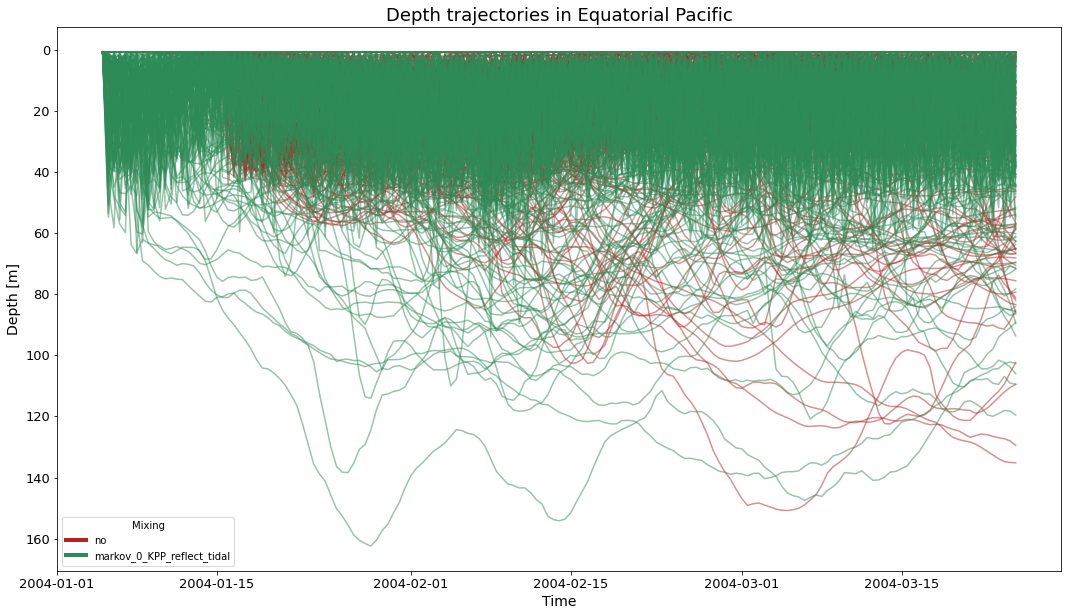

In [11]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes()

for i in range(len(dslist)):
    ax.plot(dslist[i]['time'].T[:,::f_plt], dslist[i]['z'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.5, label = mixing[i])
# ax.plot(ds['time'].T[:,::f_plt], ds['z'].T[:,::f_plt], c=mixing_cmap[2], alpha=0.3, label = mixing[1])

ax.set_title('Depth trajectories in '+regions[region], fontsize=18)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
# ax.set_ylim(100,0)
ax.tick_params(axis='both', labelsize=13)
ax.invert_yaxis()
# ax.set_xticks(times[::6].values)
# ax.set_xticklabels(timelabels[::6].values)
# ax.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                Line2D([0], [0], color=mixing_cmap[1], lw=4)]

ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
plt.show()

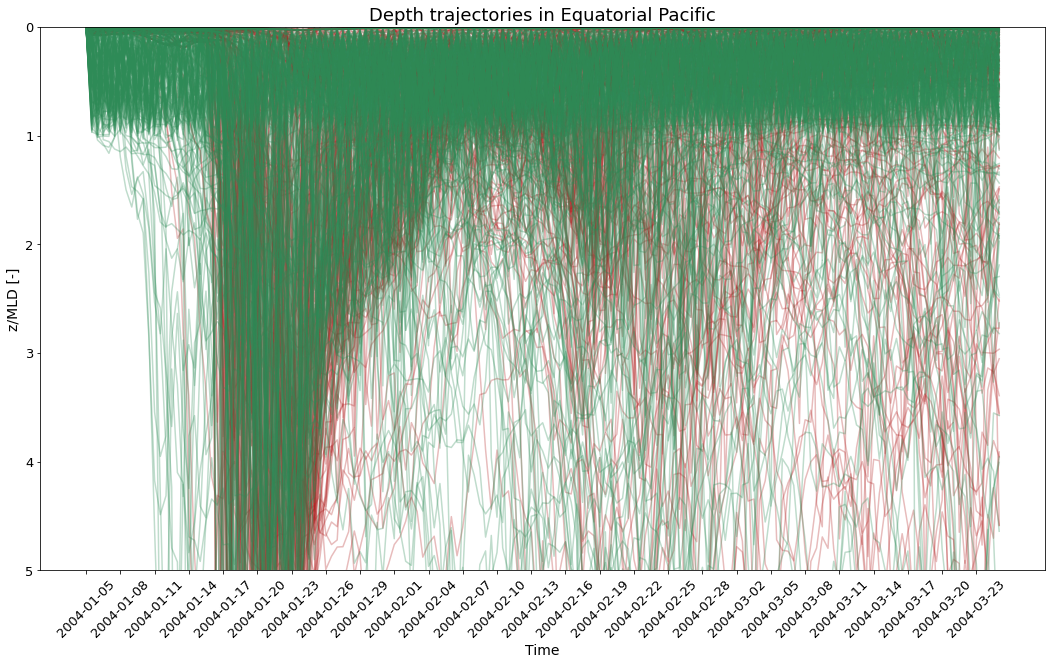

In [118]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes()

for i in range(len(dslist)):
    ax.plot(dslist[i]['time'].astype('O').T[:,::f_plt], dslist[i]['mld'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[0])

ax.set_title('Depth trajectories in '+regions[region], fontsize=18)
ax.set_ylabel('z/MLD [-]', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.tick_params(axis='both', labelsize=13)
ax.set_xticks(times[::6].values)
ax.set_xticklabels(timelabels[::6].values)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(5,0)


plt.show()

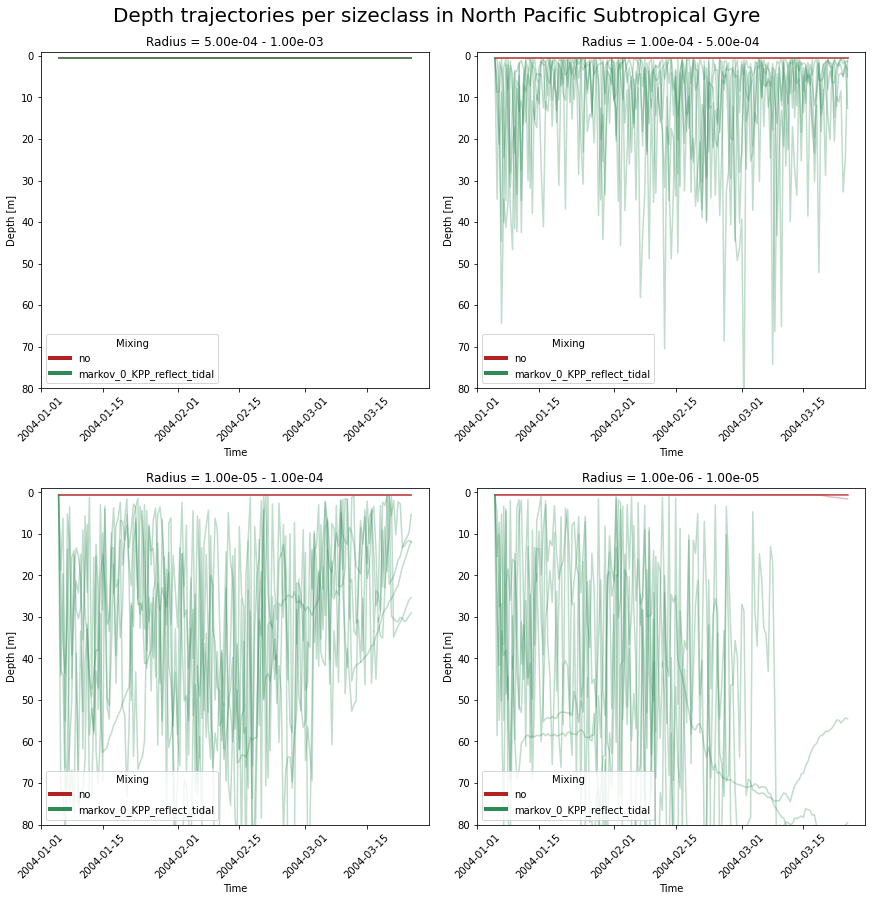

In [13]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)
fig.suptitle('Depth trajectories per sizeclass in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [ax1, ax2, ax3, ax4]

for r, ax in enumerate(axes):
    for i in range(len(mixing)):
        split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
        ax.plot(split_ds[r][1]['time'].T[:,::f_plt], split_ds[r][1]['z'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])

    ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[r][0].left, right=split_ds[r][0].right))
    ax.set_ylabel('Depth [m]')
    ax.set_xlabel('Time')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(80,-1)

    custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                    Line2D([0], [0], color=mixing_cmap[1], lw=4)]

    ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
    
    
plt.show()

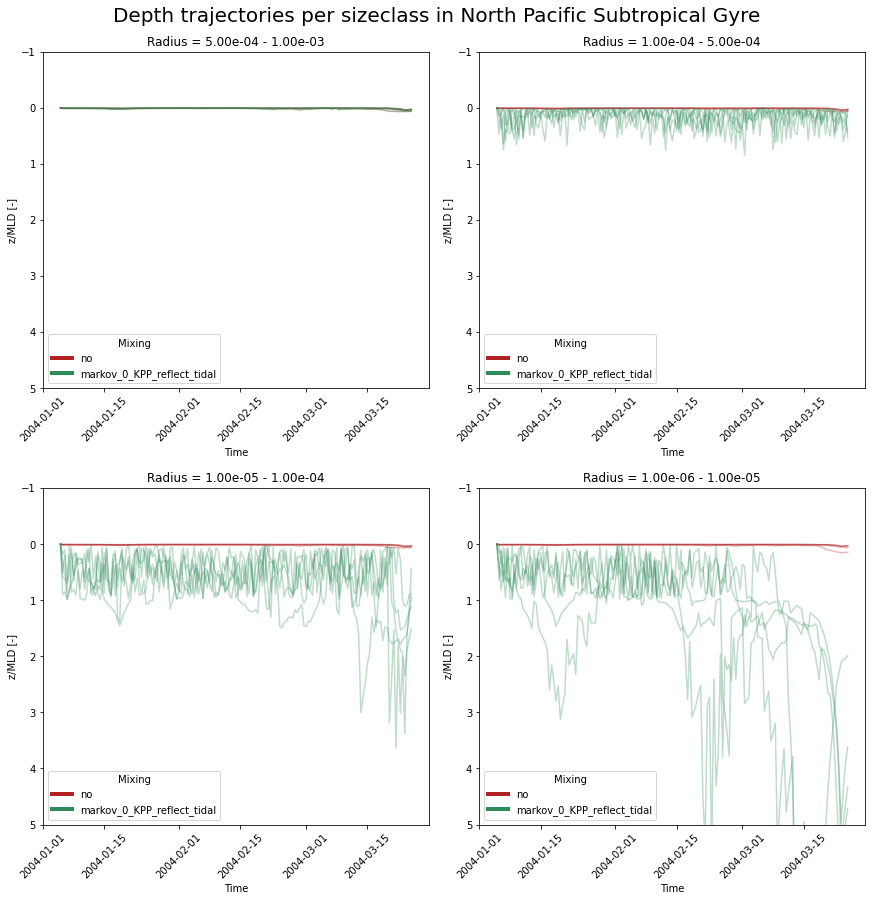

In [14]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)
fig.suptitle('Depth trajectories per sizeclass in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [ax1, ax2, ax3, ax4]

for r, ax in enumerate(axes):
    for i in range(len(mixing)):
        split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
        ax.plot(split_ds[r][1]['time'].T[:,::f_plt], split_ds[r][1]['mld'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])

    ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[r][0].left, right=split_ds[r][0].right))
    ax.set_ylabel('z/MLD [-]')
    ax.set_xlabel('Time')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(5,-1)

    custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                    Line2D([0], [0], color=mixing_cmap[1], lw=4)]

#     ax.invert_yaxis()
    ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
plt.show()

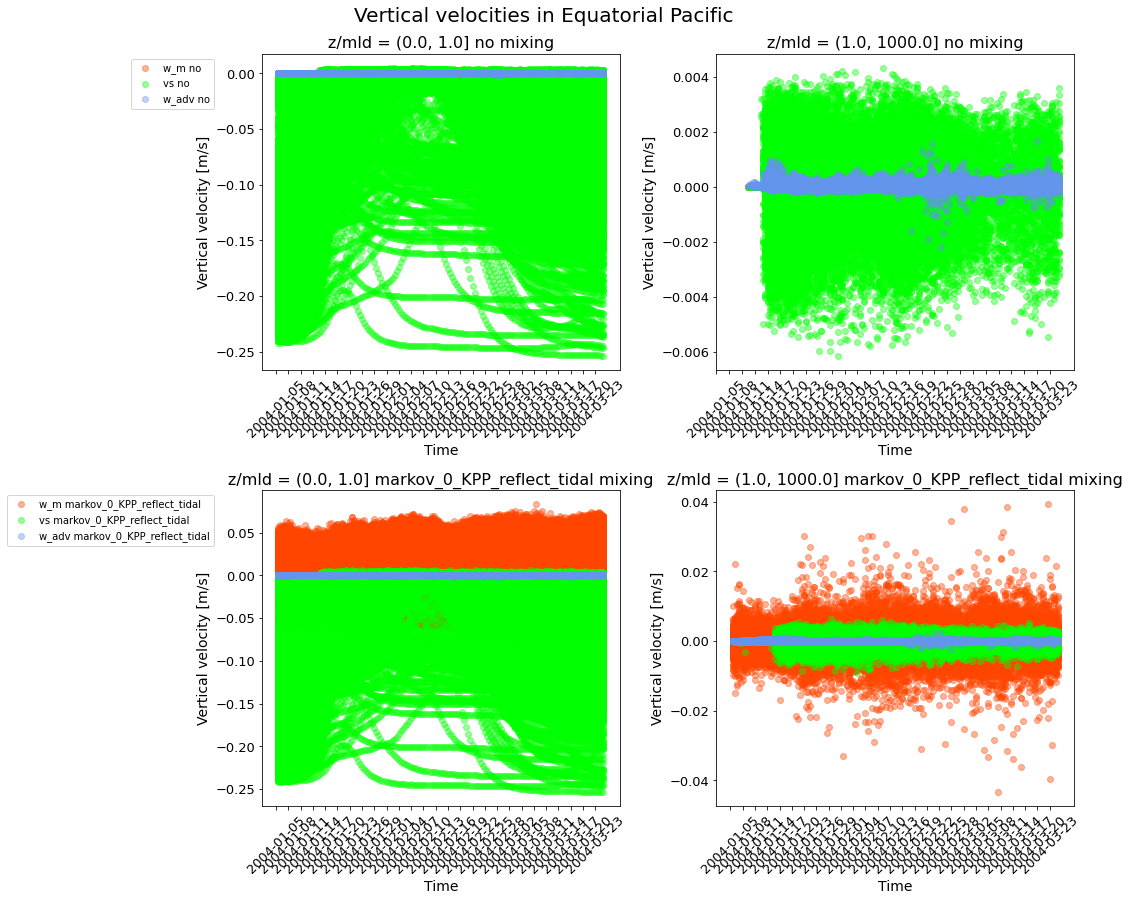

In [36]:
fig = plt.figure(figsize=(15,12),constrained_layout=True)
fig.suptitle('Vertical velocities in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [[ax1, ax2], [ax3, ax4]]

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('mld',[0,1,1000]))
    for c, ds in enumerate(split_ds):
        axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['w_m'], c=w_vel_cmap[0], edgecolor=w_vel_cmap[0], alpha=0.4, label = 'w_m '+mixing[i])
        axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['vs_init'], c=w_vel_cmap[1], edgecolor=w_vel_cmap[1], alpha=0.4, label = 'vs '+mixing[i])
        axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['w_adv'], c=w_vel_cmap[2], edgecolor=w_vel_cmap[2], alpha=0.4, label = 'w_adv '+mixing[i])

        axr[c].set_xlabel('Time', fontsize=14)
        axr[c].set_xticks(times[::6].values)
        axr[c].set_xticklabels(timelabels[::6].values)
        axr[c].tick_params(axis='both', labelsize=13)
        axr[c].tick_params(axis='x', rotation=45)
#         ax.set_ylim(-0.00001,0.00001)
        axr[c].set_ylabel('Vertical velocity [m/s]', fontsize=14)
        axr[c].set_title('z/mld = '+ str(split_ds[c][0])+' '+mixing[i]+' mixing', fontsize=16)
    axr[0].legend(bbox_to_anchor=(-0.12, 1), loc='upper right')

In [112]:
%matplotlib inline

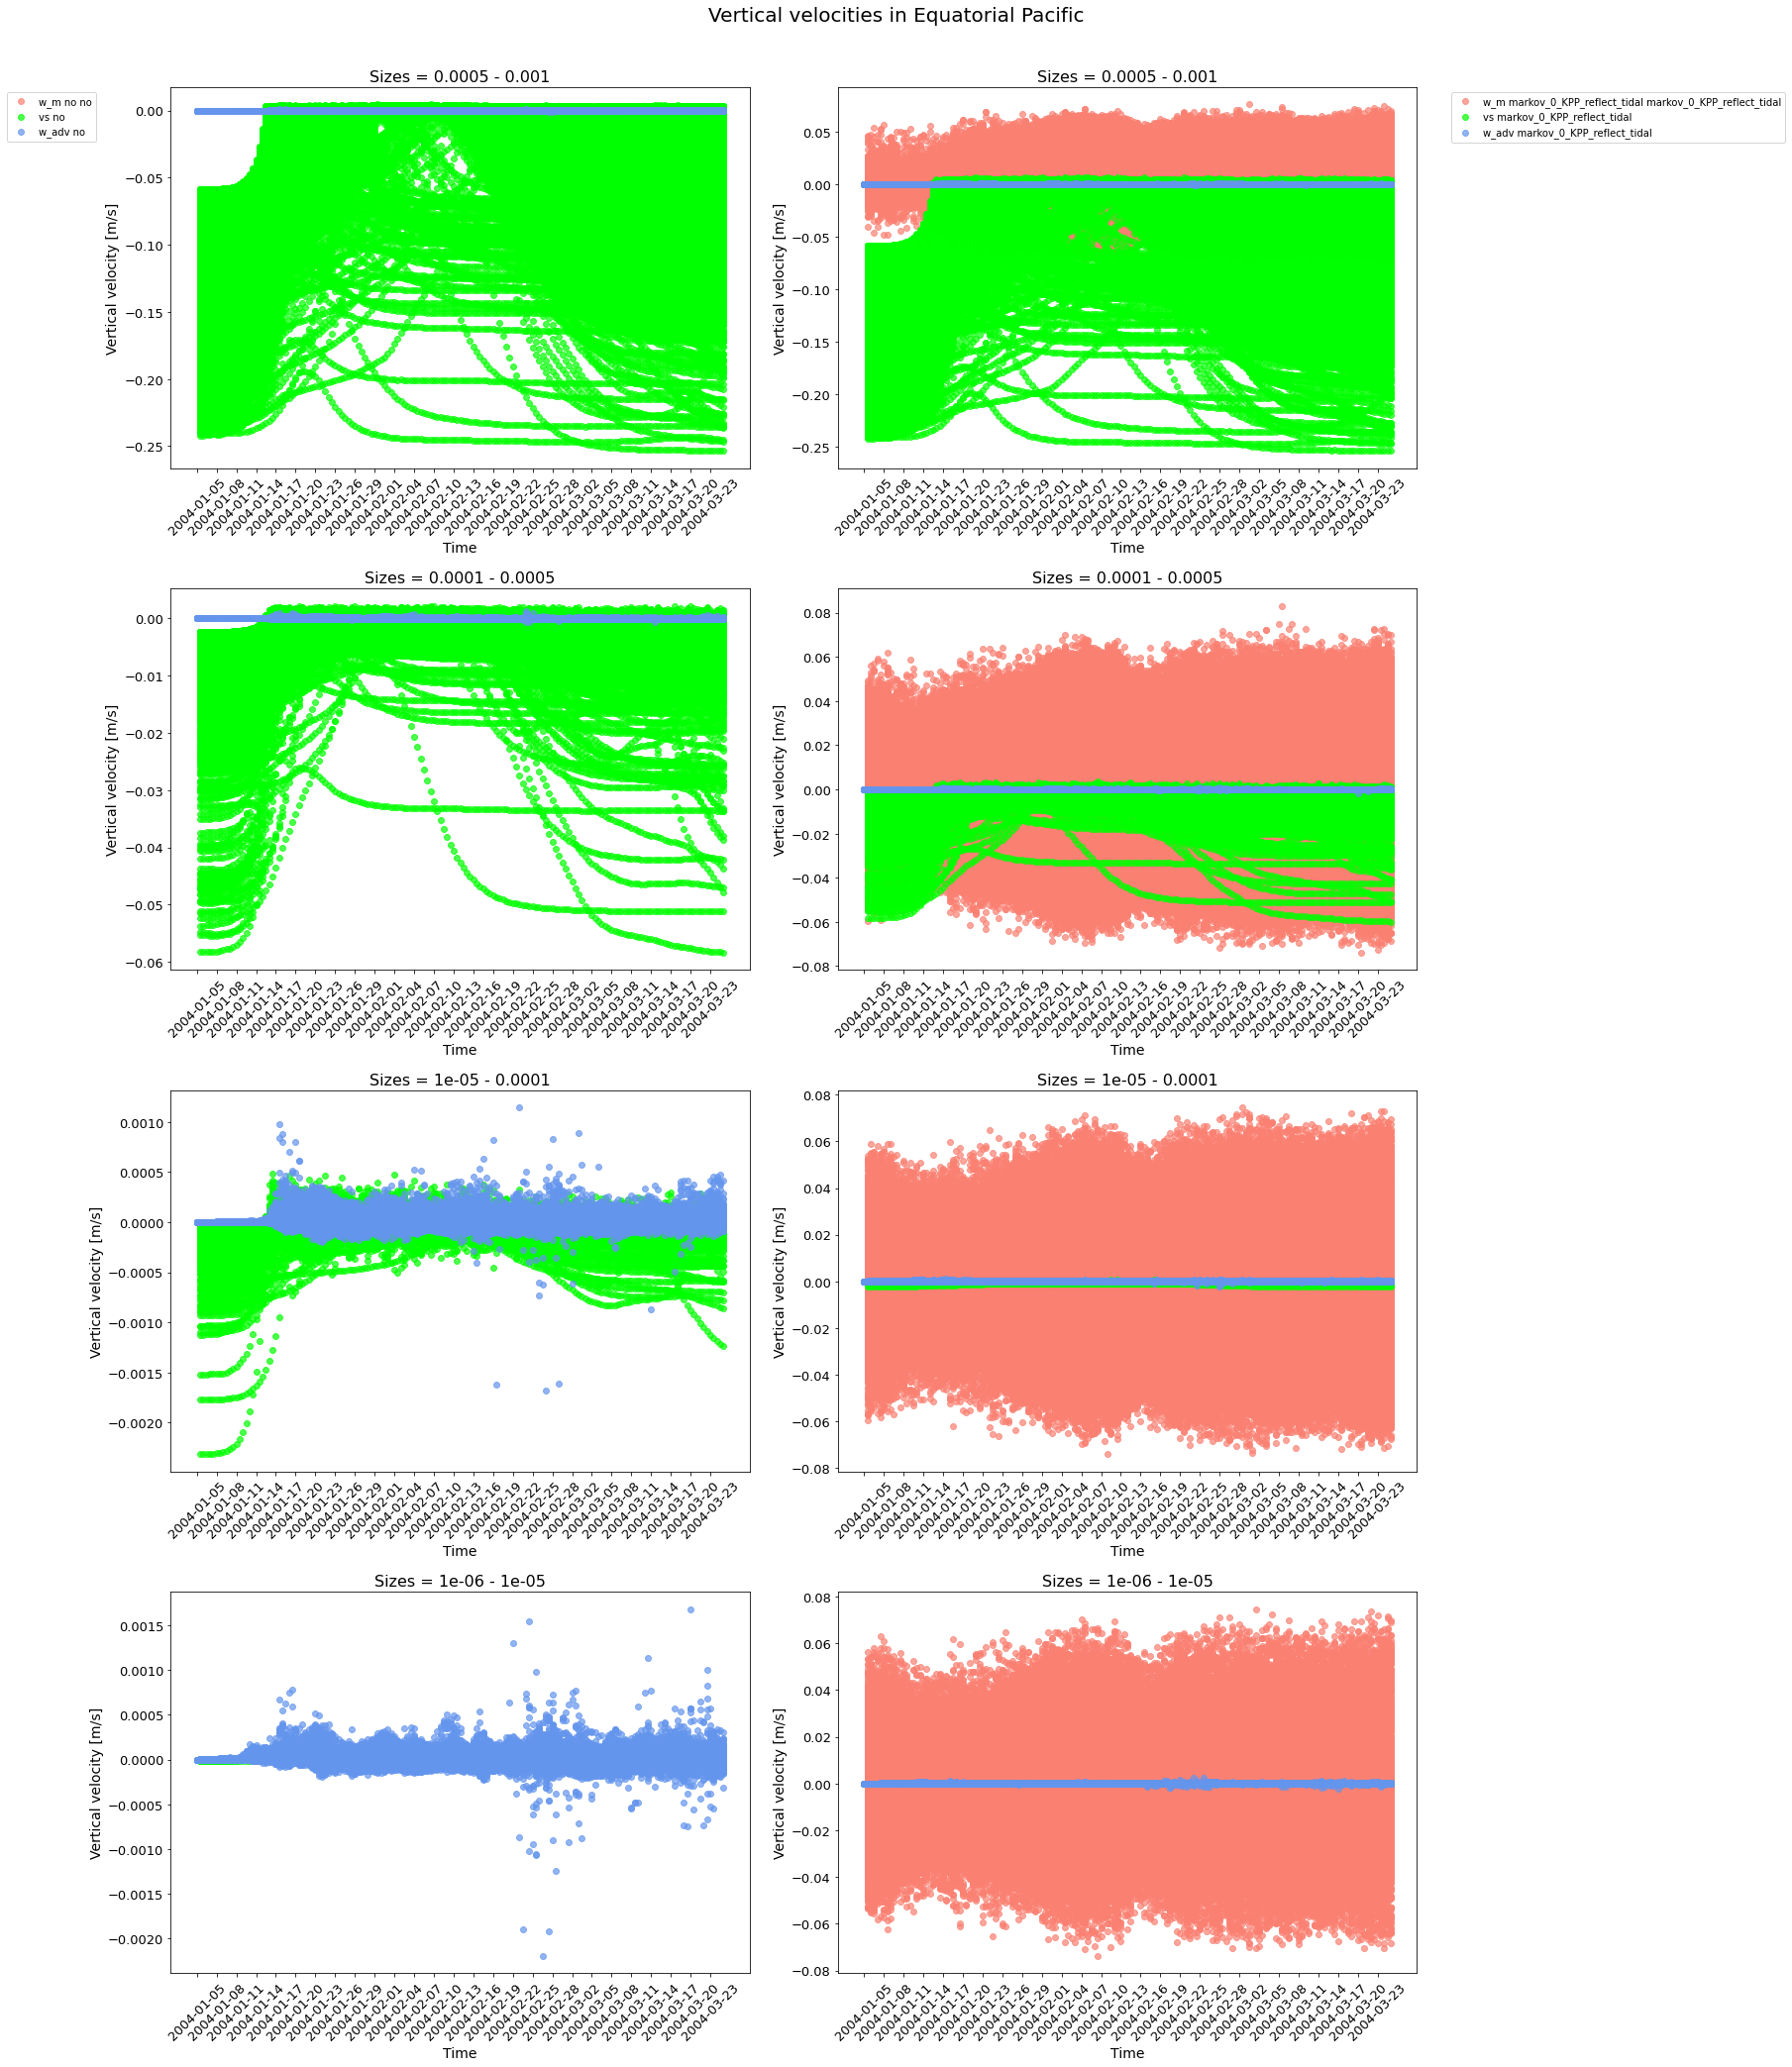

In [28]:
fig = plt.figure(figsize=(25,28),constrained_layout=True)
fig.suptitle('Vertical velocities in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[3, 1])
axes = [[ax1, ax2, ax3, ax4],[ax5, ax6, ax7, ax8]]
locs = ['upper right','upper left']
anchors = [-0.12, 1.05]

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
    for c, ds in enumerate(split_ds):
        axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['w_m'], c=w_vel_cmap[0], alpha=0.7, label = 'w_m '+mixing[i]+' '+mixing[i])
        axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['vs_init'], c=w_vel_cmap[1], alpha=0.7, label = 'vs '+mixing[i])
        axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['w_adv'], c=w_vel_cmap[2], alpha=0.7, label = 'w_adv '+mixing[i])

        axr[c].set_xlabel('Time', fontsize=14)
        axr[c].set_xticks(times[::6].values)
        axr[c].set_xticklabels(timelabels[::6].values)
        axr[c].tick_params(axis='both', labelsize=13)
        axr[c].tick_params(axis='x', rotation=45)
#         ax.set_ylim(-0.00001,0.00001)
        axr[c].set_ylabel('Vertical velocity [m/s]', fontsize=14)
        axr[c].set_title('Sizes = '+ str(split_ds[c][0].left)+' - '+str(split_ds[c][0].right), fontsize=16)
#     axr[0].text(0.5, 1.3,mixing[i])
    axr[0].legend(bbox_to_anchor=(anchors[i], 1), loc=locs[i])

In [14]:
w_bins = [-1e0, -1e-1, -1e-2, -1e-3, -1e-4, -1e-5, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
w_bincenters = [-2e-1, -2e-2, -2e-3, -2e-4, -2e-5, 0, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1]
w_list = ['w_m', 'w_m_b', 'vs_init', 'w_adv']
w_pdf = np.zeros((len(dslist),len(w_list),len(w_bins)-1))
linestyles=['-','-.']

for i,ds in enumerate(dslist):
    for j,w in enumerate(w_list):
        vals, bins = np.histogram(ds[w], w_bins)
        w_pdf[i,j,:] = vals/ds[w].size

KeyError: 'w_m_b'

In [ ]:
w_widths = np.ones(w_pdf.shape[2])
w_centers = np.arange(w_pdf.shape[2])
w_edges = np.arange(w_pdf.shape[2]+1)-0.5
w_bin_str = [np.format_float_scientific(w,2,exp_digits=1) for w in w_bins]

NameError: name 'w_centers' is not defined

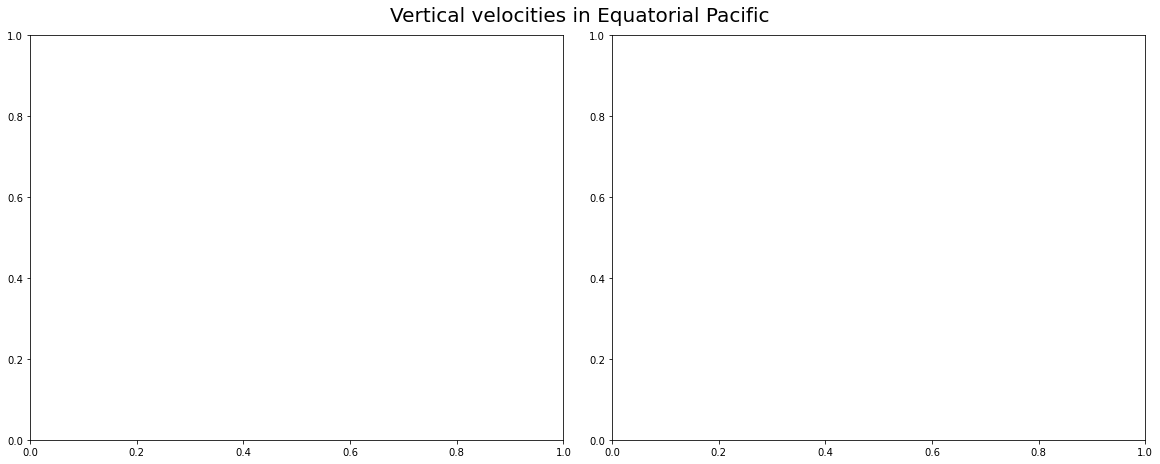

In [15]:
fig = plt.figure(figsize=(16,6),constrained_layout=True)
fig.suptitle('Vertical velocities in '+regions[region], fontsize=20, y=1.05)
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
axes = [ax1, ax2]
for i,ds in enumerate(dslist):
    for j,w in enumerate(w_list):
        axes[i].barh(w_centers, w_pdf[i,j], align='center', alpha=0.5, color=w_vel_cmap[j], edgecolor=w_vel_cmap[j], linewidth=2, label=w)
    axes[i].set_xlim(0,1.)
    axes[i].set_yticks(w_edges)
    axes[i].set_yticklabels(w_bin_str)
    axes[i].invert_yaxis()
    axes[i].tick_params(axis='both', labelsize=13)
    axes[i].set_xlabel('Fraction of observations', fontsize=14)
    axes[i].set_ylabel('Vertical velocity [m/s]', fontsize=14)
    axes[i].set_title(mixing[i]+' mixing', fontsize=16)
axes[-1].legend(fontsize=12)

In [183]:
w_pdf_sizes = np.zeros((len(dslist),len(w_list),len(sizebinedges)-1,len(w_bins)-1))

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for j,w in enumerate(w_list):
        for k,ds_r in enumerate(split_ds):
            vals, bins = np.histogram(ds_r[1][w], w_bins)
            w_pdf_sizes[i,j,k,:] = vals/ds_r[1][w].size

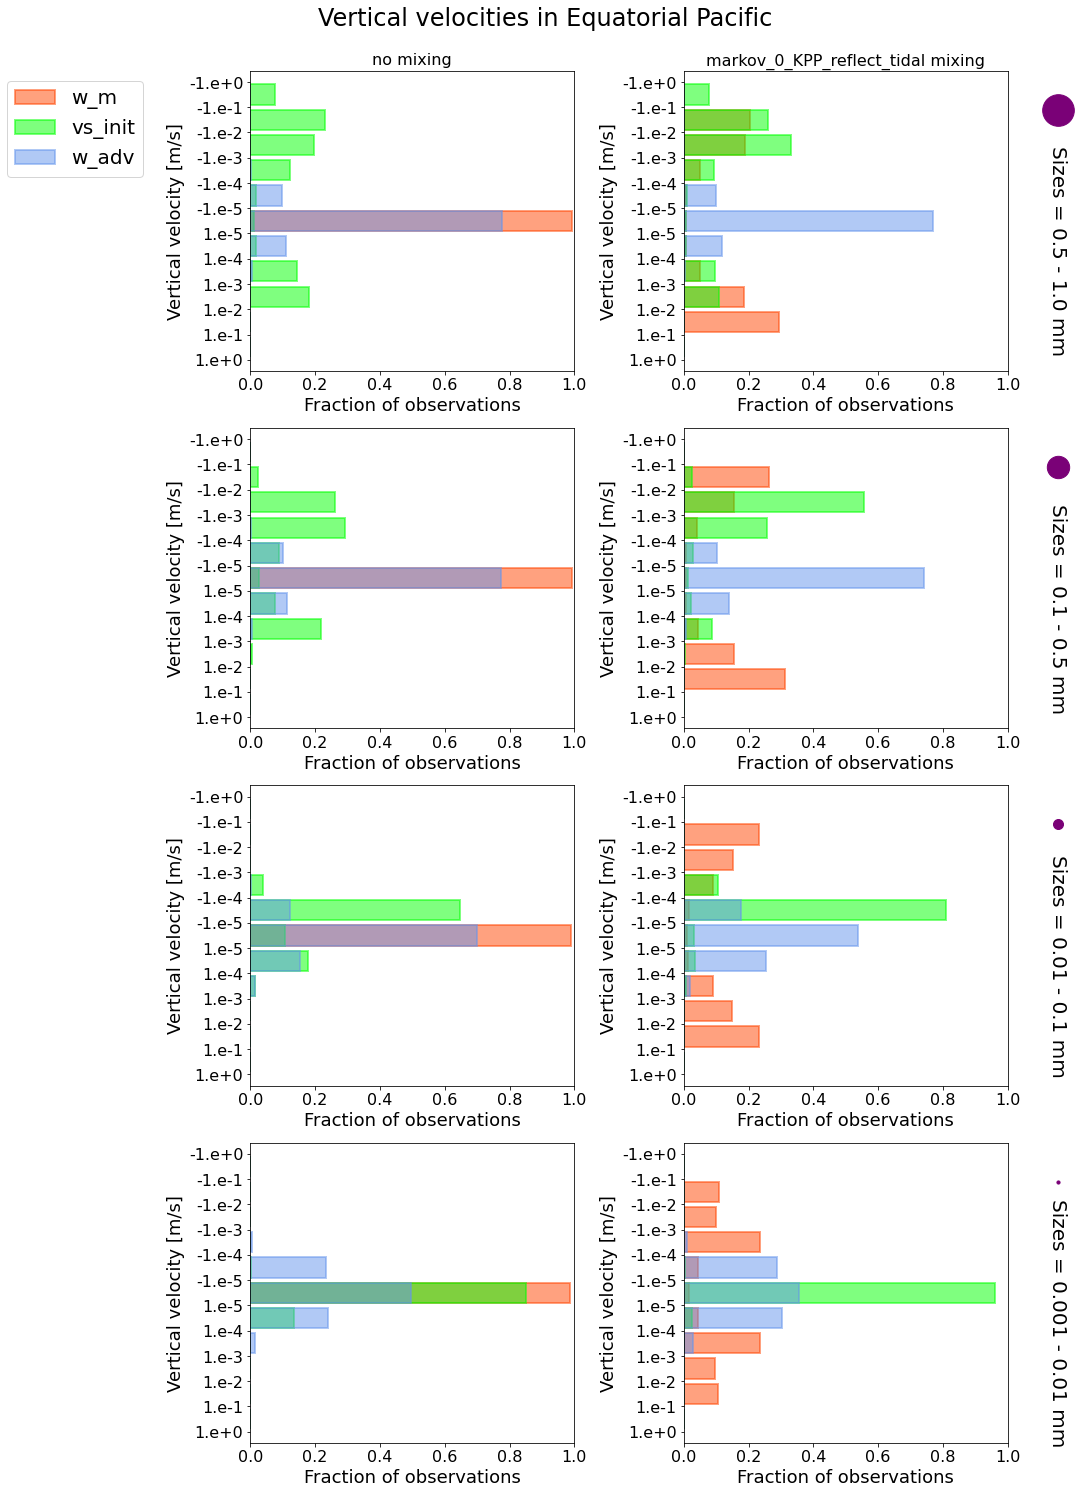

In [184]:
fig = plt.figure(figsize=(15,20),constrained_layout=True)
fig.suptitle('Vertical velocities in '+regions[region], fontsize=24, y=1.03)
gs = gridspec.GridSpec(ncols=3, nrows=4, width_ratios=[1,1,0.15],figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[3, 1])
ax9 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 2])
ax11 = fig.add_subplot(gs[2, 2])
ax12 = fig.add_subplot(gs[3, 2])
axes = [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8], [ax9, ax10, ax11, ax12]]

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for k, ds_r in enumerate(split_ds):
        for j,w in enumerate(w_list):
            axes[i][k].barh(w_centers, w_pdf_sizes[i,j,k], align='center', alpha=0.5, color=w_vel_cmap[j], edgecolor=w_vel_cmap[j], linewidth=2, label=w)
        axes[i][k].set_xlim(0,1.)
        axes[i][k].set_yticks(w_edges)
        axes[i][k].set_yticklabels(w_bin_str)
        axes[i][k].invert_yaxis()
        axes[i][k].tick_params(axis='both', labelsize=16)
        axes[i][k].set_xlabel('Fraction of observations', fontsize=18)
        axes[i][k].set_ylabel('Vertical velocity [m/s]', fontsize=18)
    axes[i][0].set_title(mixing[i]+' mixing', fontsize=16)
    
split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
for k, ds_r in enumerate(split_ds):
#     circle = plt.Circle((0.5, 0.87), sizebinedges[k]*100, color=r_pl_cmap[0])
#     axes[2][k].add_patch(circle)
    axes[2][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_cmap[0])
    axes[2][k].set_ylim(0,1)
    axes[2][k].text(0.5,0.4,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=270,fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[2][k].axis('off')
axes[0][0].legend(fontsize=20, bbox_to_anchor=(-0.3, 1))

In [36]:
depthbins = np.linspace(0,200,50)
starttimes=(dslist[0]['time'][0,:]-np.timedelta64(60, 'h')).values
endtime = (dslist[0]['time'][0,-1]+np.timedelta64(60, 'h')).values
timebins = np.append(starttimes,endtime)
depth_densities = np.zeros((len(dslist),len(dslist[0]['obs']),len(depthbins)-1))

for i in range(len(depth_densities)):
    for j in range(len(dslist[i]['obs'])):
        values, bins = np.histogram(dslist[i]['z'].isel(obs=j), depthbins)
        depth_densities[i,j] = values/len(dslist[i]['traj'])

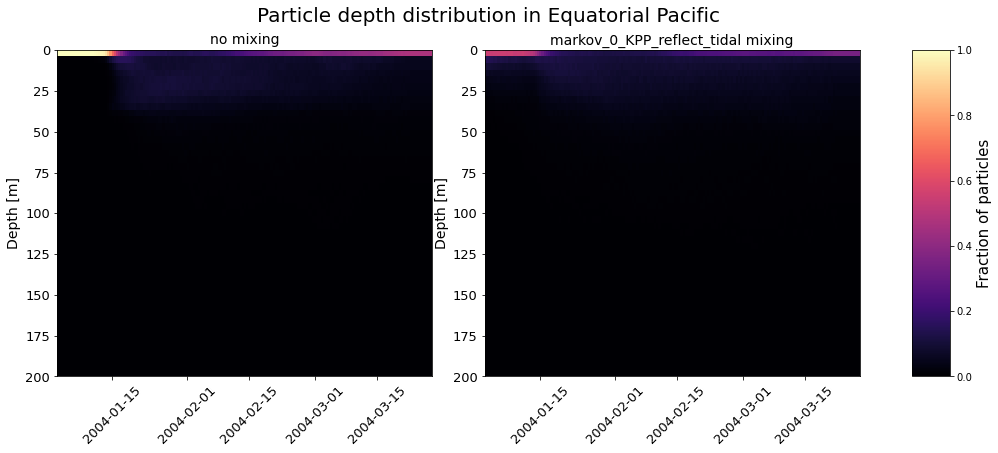

In [37]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Particle depth distribution in '+regions[region], fontsize=20)
gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,0.1], figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
axes = [ax1,ax2]
for i,ax in enumerate(axes):
    ax.set_facecolor('k')
    pc = ax.pcolormesh(timebins,depthbins,depth_densities[i].T, cmap='magma')
    ax.set_title(mixing[i]+' mixing', fontsize=14)
    ax.set_ylabel('Depth [m]', fontsize=14)
    ax.tick_params(axis='both', labelsize=13)
    ax.tick_params(axis='x', rotation=45)
    ax.invert_yaxis()
cb = fig.colorbar(pc, cax=ax3)
cb.set_label('Fraction of particles', size=15)

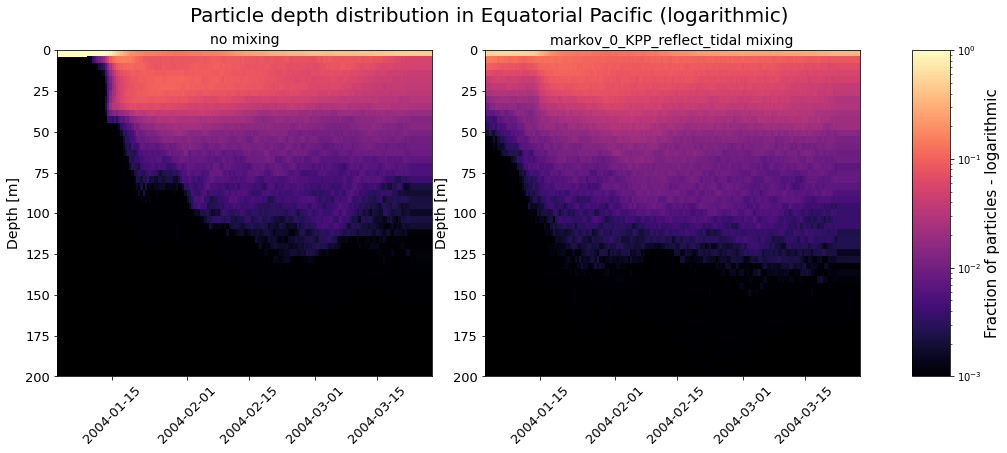

In [38]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Particle depth distribution in '+regions[region]+' (logarithmic)', fontsize=20)
gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,0.1], figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
axes = [ax1,ax2]
for i,ax in enumerate(axes):
    ax.set_facecolor('k')
    pc = ax.pcolormesh(timebins,depthbins,depth_densities[i].T, cmap='magma',norm=mcolors.LogNorm(vmin=1e-3, vmax=1))
    ax.set_title(mixing[i]+' mixing', fontsize=14)
    ax.set_ylabel('Depth [m]', fontsize=14)
    ax.tick_params(axis='both', labelsize=13)
    ax.tick_params(axis='x', rotation=45)
    ax.invert_yaxis()
cb = fig.colorbar(pc, cax=ax3)
cb.set_label('Fraction of particles - logarithmic', size=15)

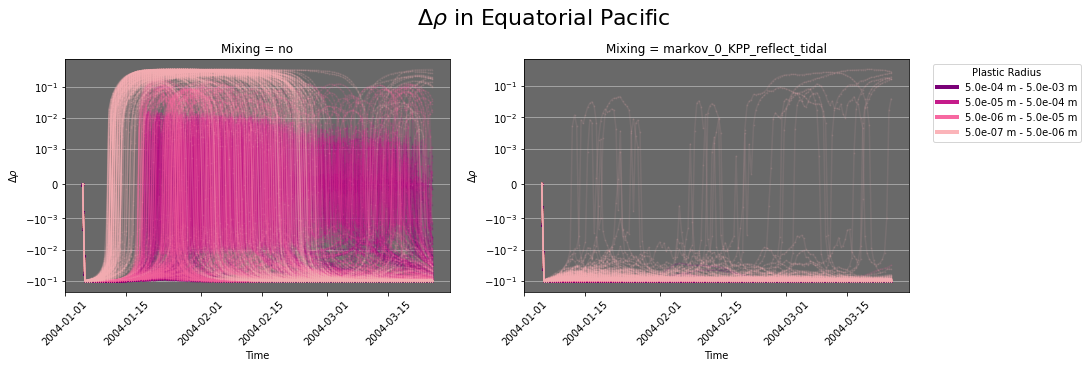

In [18]:
fig, axes = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('$\\Delta \\rho$'+ ' in '+regions[region], fontsize=22)

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
    for j, r in enumerate(split_ds):
        axr.plot(r[1]['time'].T[:,:n_plt], r[1]['delta_rho'].T[:,:n_plt], marker='o', markersize=1,c=r_pl_cmap[j], alpha = 0.1)
    axr.set_facecolor('dimgray')
    axr.grid(b=True, axis='y')
    axr.set_title('Mixing = '+mixing[i])
    axr.set_ylabel('$\\Delta \\rho$')
    axr.set_xlabel('Time')
    axr.tick_params(axis='x', rotation=45)
    axr.set_yscale('symlog',linthresh=1e-3)
#     axr.set_ylim(-0.5,0.5)


custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

axes[1].legend(custom_lines, ["{left:.1e} m - {right:.1e} m".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} m - {right:.1e} m".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} m - {right:.1e} m".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} m - {right:.1e} m".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

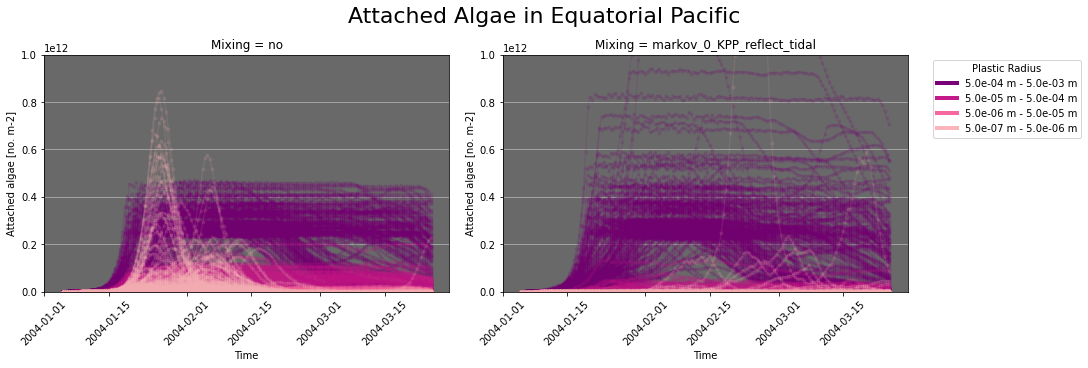

In [22]:
fig, axes = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Attached Algae'+ ' in '+regions[region], fontsize=22)

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
    for j, r in enumerate(split_ds):
        axr.plot(r[1]['time'].T[:,:n_plt], r[1]['a'].T[:,:n_plt], marker='o', markersize=3,c=r_pl_cmap[j], alpha = 0.1)
    axr.set_facecolor('dimgray')
    axr.grid(b=True, axis='y')
    axr.set_title('Mixing = '+mixing[i])
    axr.set_ylabel('Attached algae [no. m-2]')
    axr.set_xlabel('Time')
    axr.tick_params(axis='x', rotation=45)
    axr.set_ylim(-1e2,1e12)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

axes[1].legend(custom_lines, ["{left:.1e} m - {right:.1e} m".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} m - {right:.1e} m".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} m - {right:.1e} m".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} m - {right:.1e} m".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

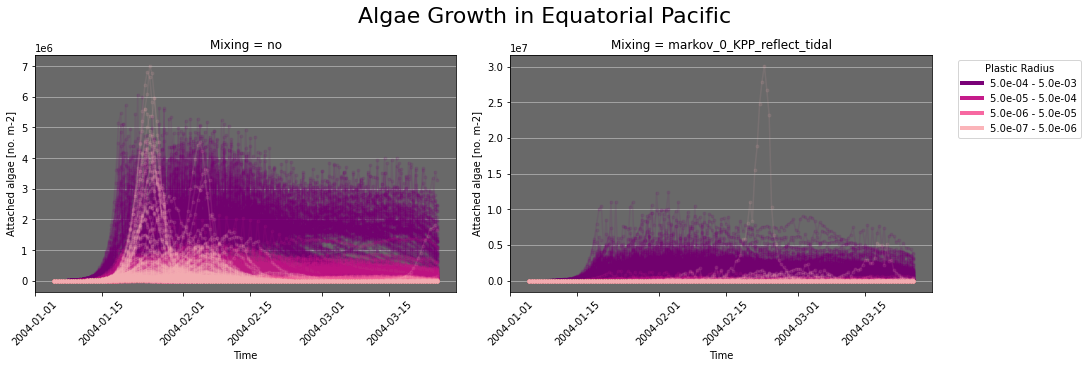

In [18]:
fig, axes = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Algae Growth'+ ' in '+regions[region], fontsize=22)

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
    for j, r in enumerate(split_ds):
        axr.plot(r[1]['time'].T[:,:n_plt], r[1]['a_growth'].T[:,:n_plt], marker='o', markersize=3,c=r_pl_cmap[j], alpha = 0.1)
    axr.set_facecolor('dimgray')
    axr.grid(b=True, axis='y')
    axr.set_title('Mixing = '+mixing[i])
    axr.set_ylabel('Attached algae [no. m-2]')
    axr.set_xlabel('Time')
    axr.tick_params(axis='x', rotation=45)
#     axr.set_ylim(-1e2,1e12)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

axes[1].legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

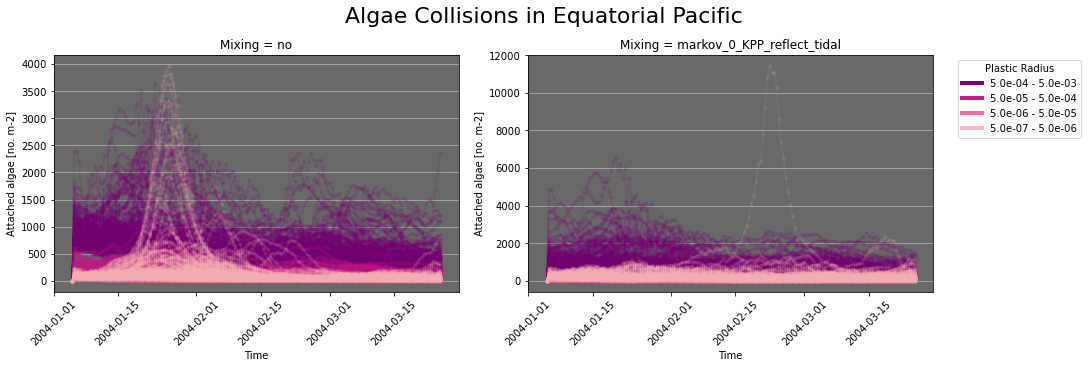

In [19]:
fig, axes = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Algae Collisions'+ ' in '+regions[region], fontsize=22)

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
    for j, r in enumerate(split_ds):
        axr.plot(r[1]['time'].T[:,:n_plt], r[1]['a_coll'].T[:,:n_plt], marker='o', markersize=3,c=r_pl_cmap[j], alpha = 0.1)
    axr.set_facecolor('dimgray')
    axr.grid(b=True, axis='y')
    axr.set_title('Mixing = '+mixing[i])
    axr.set_ylabel('Attached algae [no. m-2]')
    axr.set_xlabel('Time')
    axr.tick_params(axis='x', rotation=45)
#     axr.set_ylim(-1e2,1e12)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

axes[1].legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

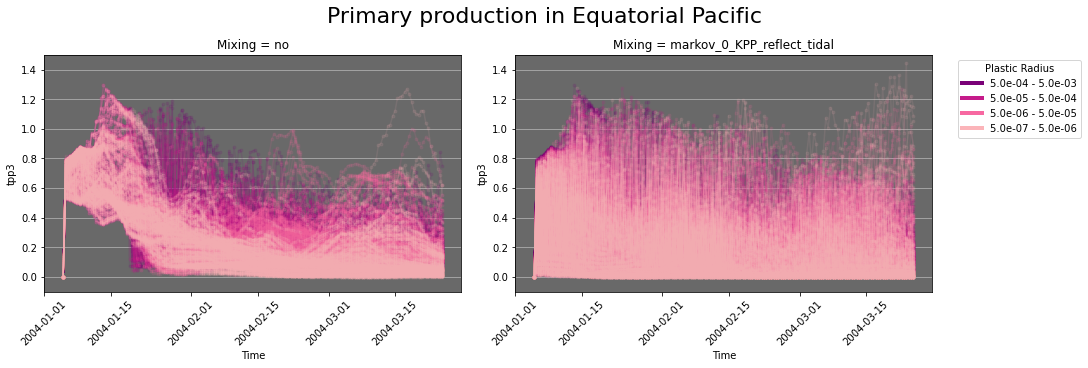

In [20]:
fig, axes = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Primary production'+ ' in '+regions[region], fontsize=22)

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
    for j, r in enumerate(split_ds):
        axr.plot(r[1]['time'].T[:,:n_plt], r[1]['tpp3'].T[:,:n_plt], marker='o', markersize=3,c=r_pl_cmap[j], alpha = 0.1)
    axr.set_facecolor('dimgray')
    axr.grid(b=True, axis='y')
    axr.set_title('Mixing = '+mixing[i])
    axr.set_ylabel('tpp3')
    axr.set_xlabel('Time')
    axr.tick_params(axis='x', rotation=45)
    axr.set_ylim(-0.1,1.5)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

axes[1].legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [11]:
ds_0

<xarray.Dataset>
Dimensions:     (obs: 161, traj: 10000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float64 ...
    lon         (traj, obs) float64 ...
    z           (traj, obs) float64 ...
    u           (traj, obs) float32 ...
    v           (traj, obs) float32 ...
    w           (traj, obs) float32 ...
    w_adv       (traj, obs) float32 ...
    density     (traj, obs) float32 ...
    tpp3        (traj, obs) float32 ...
    d_phy       (traj, obs) float32 ...
    nd_phy      (traj, obs) float32 ...
    a           (traj, obs) float32 ...
    a_coll      (traj, obs) float32 ...
    a_growth    (traj, obs) float32 ...
    a_resp      (traj, obs) float32 ...
    kin_visc    (traj, obs) float32 ...
    sw_visc     (traj, obs) float32 ...
    vs          (traj, obs) float32 ...
    w_m         (traj, obs) float32 ...
    mld         (traj, obs) float32 ...
    rho_tot     (traj, obs) float32 ...
    r_tot       (traj, obs) float32 ...
    delta_rho   (traj, obs) float32 ...
    vs_init     (traj, obs) float32 ...
    r_pl        (traj) float32 ...
    rho_pl      (traj) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev73+g4c115ed
    parcels_mesh:           spherical
    collision efficiency:   1.0
    mortality rate:         0.39

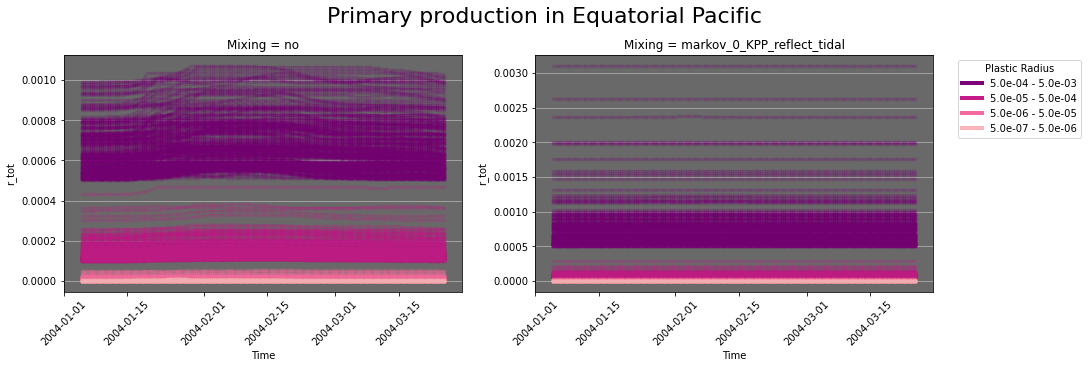

In [13]:
fig, axes = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Primary production'+ ' in '+regions[region], fontsize=22)

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
    for j, r in enumerate(split_ds):
        axr.plot(r[1]['time'].T[:,:n_plt], r[1]['r_tot'].T[:,:n_plt], marker='o', markersize=3,c=r_pl_cmap[j], alpha = 0.1)
    axr.set_facecolor('dimgray')
    axr.grid(b=True, axis='y')
    axr.set_title('Mixing = '+mixing[i])
    axr.set_ylabel('r_tot')
    axr.set_xlabel('Time')
    axr.tick_params(axis='x', rotation=45)
#     axr.set_ylim(-0.1,1.5)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

axes[1].legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

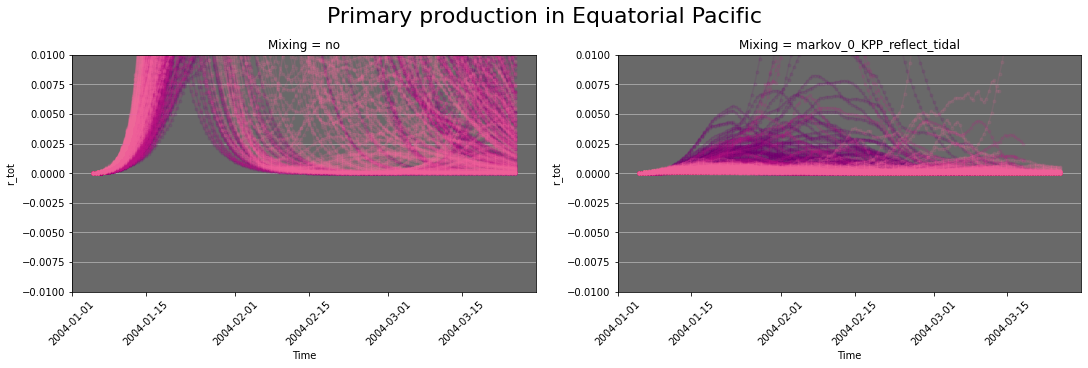

In [23]:
fig, axes = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Primary production'+ ' in '+regions[region], fontsize=22)

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[-2::-1]))
    for j, r in enumerate(split_ds):
        axr.plot(r[1]['time'].T[:,:n_plt], (r[1]['r_tot'].T[:,:n_plt]- r[1]['r_pl'].T[:n_plt])/r[1]['r_pl'].T[:n_plt], marker='o', markersize=3,c=r_pl_cmap[j], alpha = 0.1)
    axr.set_facecolor('dimgray')
    axr.grid(b=True, axis='y')
    axr.set_title('Mixing = '+mixing[i])
    axr.set_ylabel('r_tot')
    axr.set_xlabel('Time')
    axr.tick_params(axis='x', rotation=45)
    axr.set_ylim(-0.01,0.01)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

# axes[1].legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()